# Cài đặt

In [ ]:
import numpy as np

In [ ]:
def initialize_population( num_individuals, num_variables ):
    pop = np.random.randint(2, size=(num_individuals, num_variables))
    return pop

In [ ]:
def onemax( ind ):   
    value = np.sum(ind)
    return value

In [ ]:
def trap_5(ind):
  k=5
  trap = 0
  for i in range(0,len(ind),5):
    value=np.sum(ind[i:i+5])
    if (value < k):
      value = k - 1 - value
    trap+=value
  return trap

In [ ]:
def UX( pop ):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        for idx in range(0, num_parameters):
            r = np.random.rand()
            if r < 0.5:
                temp = offspring2[idx] 
                offspring2[idx] = offspring1[idx]
                offspring1[idx] = temp

        offspring.append(offspring1)
        offspring.append(offspring2)
    offspring = np.array(offspring)
    return offspring

In [ ]:
def OneX( pop ):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    offspring = []
    
    for i in range(0, num_individuals, 2):
      index= np.random.randint(0,num_parameters)
      idx1 = indices[i]
      idx2 = indices[i+1]
      offspring1 = list(pop[idx1])
      offspring2 = list(pop[idx2])
        
      temp = offspring2[index:] 
      offspring2[index:] = offspring1[index:]
      offspring1[index:] = temp

      offspring.append(offspring1)
      offspring.append(offspring2)
    offspring = np.array(offspring)
    return offspring

In [ ]:
def tournament_selection(pop, pop_fitness,num_individuals):
    selected_indices = []
    size = 4
    count = 0
    while (True):
      indices = np.arange(len(pop))
      np.random.shuffle(indices)
      for j in range(0,len(pop),4):
        temp_table = indices[j:j+size]
        selected_indice = np.argsort(pop_fitness[temp_table])
        selected_indices.append(temp_table[selected_indice[-1]])
        count+=1
        if (count == num_individuals):
          return selected_indices 
    
    return selected_indices

In [ ]:
def POPOP(num_individuals, num_parameters,crossover, evaluation, var):
    np.random.seed(var)
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([evaluation(ind) for ind in pop])
    pop_temp = pop
    pop_temp_fitness = pop_fitness
    count=len(pop)
    while (True):
        offspring = crossover(pop)
        offspring_fitness = np.array([evaluation(ind) for ind in offspring])
        count += len(offspring)
 
        pop = np.vstack([pop, offspring])
        pop_fitness = np.concatenate((pop_fitness, offspring_fitness))

        selected_indices = tournament_selection( pop, pop_fitness,num_individuals)
        selection_set = pop[selected_indices]
        selection_fitness = pop_fitness[selected_indices]

        flag1=(pop_temp==selection_set)
        flag2=(pop_temp_fitness==selection_fitness)
        pop = selection_set
        pop_fitness = selection_fitness
        if (len(flag1[flag1==False]) <2 and len(flag2[flag2==False]) < 2 ):
          break
        pop_temp=selection_set
        pop_temp_fitness=selection_fitness  
    if(len(pop_fitness[pop_fitness!=num_parameters])!=0):
      check = False
    else:
      check = True
    return check,count

In [ ]:
def upper_bound(prob_size, crossover, evaluation, bisection):
  n=4
  temp=10*bisection
  count=0
  while (True):
    if (n>8192):
      return -1
    success,temp=POPOP(n,prob_size,crossover, evaluation,20521493+temp)
    if success:
      for i in range (temp+1, temp+10):
        success,temp=POPOP(n,prob_size,crossover, evaluation,20521493+i)
        if success==False:
            count = 0
            n*=2
            break
        else:
          count+=1
        if count==9:
          return n
    else:
      n*=2
  return n

In [ ]:
def MRPS(prob_size, crossover, evaluation, bisection):
  n_upper=upper_bound(prob_size, crossover, evaluation, bisection)
  if (n_upper==-1):
    return -1,-1
  else:
    n_lower=n_upper//2
    temp=10*bisection
    count=0
    while(n_upper-n_lower)/n_upper>0.1:
      count = 0
      n=(n_upper+n_lower)//2
      evaluate= []
      for i in range (temp, temp+10):
        success,temp=POPOP(n,prob_size,crossover, evaluation,20521493+i)
        if success:
          evaluate.append(temp)
          count+=1
      if count==10:
        n_upper = n
      else:
        n_lower= n
      if (n_upper-n_lower)<=2:
        break
  evaluate=np.array(evaluate)
  return n_upper,evaluate.mean()



# Thực nghiệm

## One max và 1X

In [ ]:
onemax_1x=[]
mrps_onemax_1x=[]
index=[10,20,40,80,160]
for i in range(len(index)):
  for j in range(10):
    n,mean=MRPS(index[i], OneX, onemax, j)
    mrps_onemax_1x.append(n)
    onemax_1x.append(mean)

mrps_onemax_1x=np.array(mrps_onemax_1x)
onemax_1x=np.array(onemax_1x)

## One max và UX

In [ ]:
onemax_ux=[]
mrps_onemax_ux=[]
index=[10,20,40,80,160]
for i in range(len(index)):
  for j in range(10):
    n,mean=MRPS(index[i], UX, onemax, j)
    mrps_onemax_ux.append(n)
    onemax_ux.append(mean)

mrps_onemax_ux=np.array(mrps_onemax_ux)
onemax_ux=np.array(onemax_ux)

## Trap_5 với 1X

In [ ]:
trap5_1x=[]
mrps_trap5_1x=[]
index=[10,20,40,80,160]
for i in range(len(index)):
  for j in range(10):
    n,mean=MRPS(index[i], OneX, trap_5, j)
    mrps_trap5_1x.append(n)
    trap5_1x.append(mean)

mrps_trap5_1x=np.array(mrps_trap5_1x)
trap5_1x=np.array(trap5_1x)

##Trap_5 với UX

In [ ]:
trap5_ux=[]
mrps_trap5_ux=[]
index=[10,20,40,80,160]
for i in range(len(index)):
  for j in range(10):
    n,mean=MRPS(index[i], UX, trap_5, j)
    mrps_trap5_ux.append(n)
    trap5_ux.append(mean)

mrps_trap5_ux=np.array(mrps_trap5_ux)
trap5_ux=np.array(trap5_ux)

## Kết quả thực nghiệm


In [ ]:
print("One max và 1X")
print(mrps_onemax_1x)
print(onemax_1x)

print("One max và UX")
print(mrps_onemax_ux)
print(onemax_ux)

print("Trap_5 với 1X")
print(mrps_trap5_1x)
print(trap5_1x)

print("Trap_5 với UX")
print(mrps_trap5_ux)
print(trap5_ux)

One max và 1X
[  24   20   26   24   30   28   28   28   28   30   64   64   68   64
   64   64   64   68   64  104  128  128  192  176  192  208  208  208
  192  128  640  832  768  896  640  832  960  832  640  640 3840 3328
 3840 3328 2816 3072 3072 3072 3840 2816]
[   193.11111111    168.            239.2           191.71428571
    252.            237.25          237.25          237.25
    231.11111111    252.            735.            733.33333333
    822.8           733.33333333    735.            735.
    733.33333333    822.8           780.           1279.2
   2460.           2460.           3168.           3220.8
   3168.           3931.2          3931.2          3744.
   3168.           2640.          16576.          22464.
  19633.77777778  22648.88888889  16272.          22796.8
  25440.          22464.          16576.          16576.
 150528.         132121.6        150528.         133120.
 110950.4        114048.         113891.55555556 114048.
 150144.         111232.  

# Đồ thị và bảng kết quả


In [ ]:
import numpy as np  
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from scipy.stats import ttest_ind_from_stats

In [ ]:
def handle(temp1,temp2):
  a_mean=[]
  b_mean=[]
  a_std=[]
  b_std=[]
  for i in range(0,50,10):
    a_mean.append(round(temp1[i:i+10].mean(),2))
    a_std.append(round(temp1[i:i+10].std(),2))

    b_mean.append(round(temp2[i:i+10].mean(),2))
    b_std.append(round(temp2[i:i+10].std(),2))
  a_mean=np.array(a_mean)
  b_mean=np.array(b_mean)
  a_std=np.array(a_std)
  b_std=np.array(b_std)
  return a_mean,b_mean,a_std,b_std

## Đồ thị 1

In [ ]:
temp1=np.array([24,20,26,24,30,28,28,28,28,30,64,64,68,64
,64,64,64,68,64,104,128,128,192,176,192,208,208,208
,192,128,640,832,768,896,640,832,960,832,640,640,3840,3328
,3840,3328,2816,3072,3072,3072,3840,2816])
temp2=np.array([24,24,18,18,20,18,24,24,24,18,52,34,34,34,34,34,34,34
,34,34,60,56,60,48,60,56,60,60,48,60,96,72,96,72,104,72
,96,96,104,72,176,160,176,160,176,176,176,160,208,176])
prob_size=[10, 20, 40, 80, 160]
onemax_mrps_onex_mean, onemax_mrps_ux_mean, onemax_mrps_onex_std, onemax_mrps_ux_std = handle(temp1,temp2)

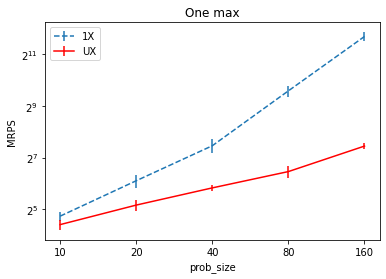

In [ ]:
plt.errorbar(prob_size,onemax_mrps_onex_mean, yerr = onemax_mrps_onex_std, linestyle='dashed', label='1X')
plt.errorbar(prob_size,onemax_mrps_ux_mean, yerr = onemax_mrps_ux_std, color='r',label='UX')
plt.ylabel("MRPS")
plt.xlabel("prob_size")
plt.yscale('log', basey=2)
plt.xscale('log', basex=2)
plt.xticks(prob_size,labels=['10','20','40','80','160'])
plt.legend()
plt.title("One max");

## Đồ thị 2

In [ ]:
temp1=np.array([193.11111111,168.,239.2,191.71428571
,252.,237.25,237.25,237.25
,231.11111111,252.,735.,733.33333333
,822.8,733.33333333,735.,735.
,733.33333333,822.8,780.,1279.2
,2460.,2460.,3168.,3220.8
,3168.,3931.2,3931.2,3744.
,3168.,2640.,16576.,22464.
,19633.77777778,22648.88888889,16272.,22796.8
,25440.,22464.,16576.,16576.
,150528.,132121.6,150528.,133120.
,110950.4,114048.,113891.55555556,114048.
,150144.,111232.,])
temp2=np.array([ 168.66666667,168.66666667,136.8, 136.8, 140.
,136.8, 168.66666667,168.66666667,168.66666667,138.6
,561.6, 374.,374.,374.,374.
,374.,370.6, 374.,374.,374.
,900.,825.5, 900.,664.88888889,900.
,825.5, 900.,900.,684.44444444,912.,
 1885.71428571, 1530., 1885.71428571, 1530., 2236.,
 1530., 1885.71428571, 1885.71428571, 2236., 1530.,
 5174.4, 4392., 5174.4, 4392., 5174.4,
 5174.4,5174.4,4392., 6136., 5174.4, ])
onemax_evaluations_onex_mean, onemax_evaluations_ux_mean, onemax_evaluations_onex_std, onemax_evaluations_ux_std = handle(temp1,temp2)

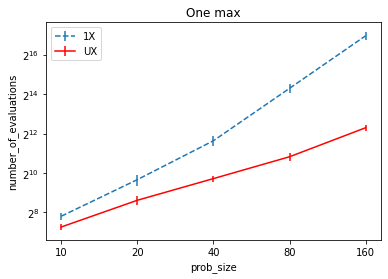

In [ ]:
plt.errorbar(prob_size,onemax_evaluations_onex_mean, yerr = onemax_evaluations_onex_std, linestyle='dashed', label='1X')
plt.errorbar(prob_size,onemax_evaluations_ux_mean, yerr = onemax_evaluations_ux_std, color='r',label='UX')
plt.ylabel("number_of_evaluations")
plt.xlabel("prob_size")
plt.yscale('log', basey=2)
plt.xscale('log', basex=2)
plt.xticks(prob_size,labels=['10','20','40','80','160'])
#plt.set_xticklabels(['10','20','40','80','160'])
plt.legend()
plt.title("One max");

## Bảng kết quả 1

In [ ]:
data = {'MRPS_onemax_1X': onemax_mrps_onex_mean,'Evaluations_onemax_1X': onemax_evaluations_onex_mean,
        'MRPS_onemax_UX': onemax_mrps_ux_mean,'Evaluations_onemax_UX': onemax_evaluations_ux_mean}
  
df_onemax = pd.DataFrame(data,prob_size)
df_onemax['MRPS_onemax_1X'] = df_onemax['MRPS_onemax_1X'].astype(str) + '(' + onemax_mrps_onex_std.astype(str) + ')'
df_onemax['Evaluations_onemax_1X'] = df_onemax['Evaluations_onemax_1X'].astype(str) + '(' + onemax_evaluations_onex_std.astype(str) + ')'
df_onemax['MRPS_onemax_UX'] = df_onemax['MRPS_onemax_UX'].astype(str) + '(' + onemax_mrps_ux_std.astype(str) + ')'
df_onemax['Evaluations_onemax_UX'] = df_onemax['Evaluations_onemax_UX'].astype(str) + '(' + onemax_evaluations_ux_std.astype(str) + ')'

t_test_onemax_MRPS,p_value_onemax_MRPS =ttest_ind_from_stats(onemax_mrps_onex_mean,onemax_mrps_onex_std,5,onemax_mrps_ux_mean,onemax_mrps_ux_std,5)
t_test_onemax_evaluations,p_value_onemax_evaluations=ttest_ind_from_stats(onemax_evaluations_onex_mean,onemax_evaluations_onex_std,5,onemax_evaluations_ux_mean,onemax_evaluations_ux_std,5)
print("t_test_onemax_MRPS : ",t_test_onemax_MRPS)
print("p_value_onemax_MRPS :",p_value_onemax_MRPS)
print("t_test_onemax_evaluations : ",t_test_onemax_evaluations)
print("p_value_onemax_evaluations :",p_value_onemax_evaluations)

t_test_onemax_MRPS :  [ 2.92851811  5.67037764  8.04781156 13.19095764 18.04416231]
p_value_onemax_MRPS : [1.90412925e-02 4.70194240e-04 4.18337517e-05 1.03920635e-06
 9.13199478e-08]
t_test_onemax_evaluations :  [ 5.0221669   5.51806319  9.82597879 12.57404921 16.70660267]
p_value_onemax_evaluations : [1.02410755e-03 5.61660796e-04 9.67541560e-06 1.50041745e-06
 1.66694012e-07]
836.0


In [ ]:
def high_light_onemax(table):
  df = table.copy()
  df.loc[:,:] = 'background-color: gray'
  for i in p_value_onemax_evaluations:
    if (i < 0.05):
      for j in range(len(onemax_evaluations_onex_mean)):
        if (onemax_evaluations_onex_mean[j] <onemax_evaluations_ux_mean[j]):
          df['Evaluations_onemax_1X'].iloc[j] = 'background-color: blue'
        else:
          df['Evaluations_onemax_UX'].iloc[j] = 'background-color: blue'
  for i in p_value_onemax_MRPS:
    if (i < 0.05):
      for j in range(len(onemax_mrps_onex_mean)):
        if (onemax_mrps_onex_mean[j] <onemax_mrps_ux_mean[j]):
          df['MRPS_onemax_1X'].iloc[j] = 'background-color: blue'
        else:
          df['MRPS_onemax_UX'].iloc[j] = 'background-color: blue'
  return df

In [ ]:
df_onemax = df_onemax.style.apply(high_light_onemax, axis=None)
df_onemax

,MRPS_onemax_1X,Evaluations_onemax_1X,MRPS_onemax_UX,Evaluations_onemax_UX
10,26.6(2.97),223.89(27.4),21.2(2.86),153.23(15.46)
20,68.8(11.84),810.98(159.96),35.8(5.4),392.42(56.4)
40,176.0(32.79),3189.12(526.91),56.8(4.66),841.23(88.57)
80,768.0(114.49),20144.75(3249.14),88.0(13.39),1813.49(264.45)
160,3302.4(387.4),128061.16(16458.32),174.4(13.29),5035.84(506.87)


## Đồ thị 3

In [ ]:
temp1=np.array([96,104,104,104, 96,104, 96,104,104, 96,192,256,256,192
,256,256,240,256,208,256,768,704,768,832,832,896,896,704
,704,768, 3840, 2560 ,3328, 2560, 3072, 2560, 3328, 3328, 3840, 2560, -1, -1
, -1, -1, -1, -1, -1, -1, -1, -1])
temp2=np.array([256,384,384,288,288,416,480,384,416,416,4352,2816,5632,4096
,4352,4352,2560,6656,2816,3328,-1,-1,-1,-1,-1,-1,-1,-1
,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
,-1,-1,-1,-1,-1,-1,-1,-1])

trap5_mrps_onex_mean, trap5_mrps_ux_mean, trap5_mrps_onex_std, trap5_mrps_ux_std = handle(temp1,temp2)


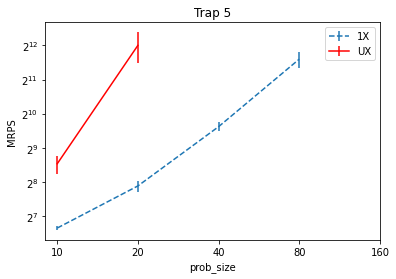

In [ ]:
plt.errorbar(prob_size[:4],trap5_mrps_onex_mean[:4], yerr = trap5_mrps_onex_std[:4], linestyle='dashed', label='1X')
plt.errorbar(prob_size[:2],trap5_mrps_ux_mean[:2], yerr = trap5_mrps_ux_std[:2], color='r',label='UX')
plt.ylabel("MRPS")
plt.xlabel("prob_size")
plt.yscale('log', basey=2)
plt.xscale('log', basex=2)
plt.xticks(prob_size,labels=['10','20','40','80','160'])
plt.legend()
plt.title("Trap 5");

## Đồ thị 4

In [ ]:
temp1=np.array([8.36000000e+02,1.00880000e+03,9.88000000e+02,1.00880000e+03
,8.36000000e+02,1.00880000e+03,8.36000000e+02,9.88000000e+02
,1.00880000e+03,8.50666667e+02,2.56177778e+03,3.22666667e+03
,3.45000000e+03,2.61485714e+03,3.45000000e+03,3.29142857e+03
,3.14400000e+03,3.29142857e+03,2.87040000e+03,3.45000000e+03
,1.39235556e+04,1.39392000e+04,1.40800000e+04,1.72224000e+04
,1.72224000e+04,1.60853333e+04,1.58080000e+04,1.39392000e+04
,1.39392000e+04,1.40800000e+04,1.07904000e+05,6.71040000e+04
,9.48480000e+04,6.80960000e+04,8.44800000e+04,6.80960000e+04
,9.65120000e+04,9.65120000e+04,1.07904000e+05,6.71040000e+04
,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00
,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00
,-1.00000000e+00,-1.00000000e+00])
temp2=np.array([2.77333333e+03,3.78400000e+03,4.14577778e+03,3.41511111e+03
,3.41511111e+03,5.32480000e+03,5.37600000e+03,3.78400000e+03
,4.82560000e+03,5.32480000e+03,1.04448000e+05,7.04000000e+04
,1.26156800e+05,9.51466667e+04,1.04448000e+05,1.04448000e+05
,5.61600000e+04,1.54419200e+05,6.33600000e+04,7.68768000e+04
,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00
,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00
,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00
,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00
,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00
,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00
,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00,-1.00000000e+00
,-1.00000000e+00,-1.00000000e+00])
trap5_evaluations_onex_mean, trap5_evaluations_ux_mean, trap5_evaluations_onex_std, trap5_evaluations_ux_std = handle(temp1,temp2)

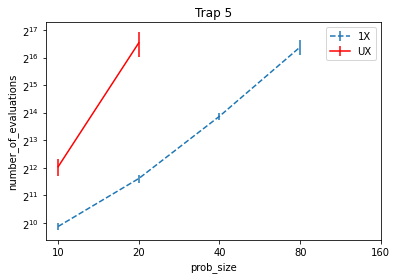

In [ ]:
plt.errorbar(prob_size[:4],trap5_evaluations_onex_mean[:4], yerr = trap5_evaluations_onex_std[:4], linestyle='dashed', label='1X')
plt.errorbar(prob_size[:2],trap5_evaluations_ux_mean[:2], yerr = trap5_evaluations_ux_std[:2], color='r',label='UX')
plt.ylabel("number_of_evaluations")
plt.xlabel("prob_size")
plt.yscale('log', basey=2)
plt.xscale('log', basex=2)
plt.xticks(prob_size,labels=['10','20','40','80','160'])
plt.legend()
plt.title("Trap 5");

## Bảng kết quả 2

In [ ]:
data = {'MRPS_trap_1X': pd.Series(trap5_mrps_onex_mean[:4], index = prob_size[:4]), 'Evaluations_trap_1X': pd.Series(trap5_evaluations_onex_mean[:4], index = prob_size[:4]), 
        'MRPS_trap_UX': pd.Series(trap5_mrps_ux_mean[:2], index = prob_size[:2]), 'Evaluations_trap_UX': pd.Series(trap5_evaluations_ux_mean[:2], index = prob_size[:2])}
table_trap = pd.DataFrame(data,index=prob_size)
table_trap['MRPS_trap_1X'] = table_trap['MRPS_trap_1X'][:4].astype(str) + '(' + trap5_mrps_onex_std[:4].astype(str) + ')'
table_trap['Evaluations_trap_1X'] = table_trap['Evaluations_trap_1X'][:4].astype(str) + '(' + trap5_evaluations_onex_std[:4].astype(str) + ')'
table_trap['MRPS_trap_UX'] = table_trap['MRPS_trap_UX'][:2].astype(str) + '(' + trap5_mrps_ux_std[:2].astype(str) + ')'
table_trap['Evaluations_trap_UX'] = table_trap['Evaluations_trap_UX'][:2].astype(str) + '(' + trap5_evaluations_onex_std[:2].astype(str) + ')'
t_test_trap5_MRPS,p_value_trap5_MRPS=ttest_ind_from_stats(trap5_mrps_onex_mean[:2],trap5_mrps_onex_std[:2],4,trap5_mrps_ux_mean[:2],trap5_mrps_ux_std[:2],2)
t_test_trap5_evaluations,p_value_trap5_evaluations=ttest_ind_from_stats(trap5_evaluations_onex_mean[:2],trap5_evaluations_onex_std[:2],4,trap5_evaluations_ux_mean[:2],trap5_evaluations_ux_std[:2],2)
print("t_test_trap5_MRPS : ",t_test_trap5_MRPS)
print("p_value_trap5_MRPS :",p_value_trap5_MRPS)
print("t_test_trap5_evaluations : ",t_test_trap5_evaluations)
print("p_value_trap5_evaluations :",p_value_trap5_evaluations)

t_test_trap5_MRPS :  [-9.21430031 -7.19200241]
p_value_trap5_MRPS : [0.00077081 0.0019804 ]
t_test_trap5_evaluations :  [-8.41096214 -7.45050447]
p_value_trap5_evaluations : [0.00109373 0.00173369]


In [ ]:
def high_light_trap(table):
  df = table.copy()
  df.loc[:,:] = 'background-color: gray'
  for i in (p_value_trap5_evaluations):
    if (i < 0.05):
      for j in range(2):
        if (trap5_evaluations_onex_mean[j] < trap5_evaluations_ux_mean[j]):
          df['Evaluations_trap_1X'].iloc[j] = 'background-color: blue'
        else:
          df['Evaluations_trap_UX'].iloc[j] = 'background-color: blue'
  for i in (p_value_trap5_MRPS):
    if (i < 0.05):
      for j in range(2):     
        if (trap5_mrps_onex_mean[j] < trap5_mrps_ux_mean[j]):
          df['MRPS_trap_1X'].iloc[j] = 'background-color: blue'
        else:
          df['MRPS_trap_UX'].iloc[j] = 'background-color: blue'
  return df

In [ ]:
table_trap = table_trap.style.apply(high_light_trap, axis=None)
table_trap

,MRPS_trap_1X,Evaluations_trap_1X,MRPS_trap_UX,Evaluations_trap_UX
10,100.8(3.92),936.99(79.92),371.2(67.43),4216.85(79.92)
20,236.8(26.58),3135.06(320.04),4096.0(1238.36),95586.35(320.04)
40,787.2(70.4),15023.93(1339.05),nan,nan
80,3097.6(491.76),85856.0(16174.64),nan,nan
160,nan,nan,nan,nan


# Nhận xét

1. Đối với hàm onemax, khi sử dụng phương pháp lại đồng nhất (UX) sẽ cho ra kết 
quả tốt hơn phương pháp lai 1 điểm (1X) về cả thời gian thực thi lẫn num_individuals ít hơn. Cả 2 phương pháp lai đều giải được hết các prob_size yêu cầu. 
2. Đối với hàm trap, kết quả thể hiện lại ngược lại so với onemax. Trap function hoạt động tốt hơn đối với phép lai 1X. Tuy nhiên phép lai 1X với trap chỉ giải được 4 prob_size là (10, 20, 40 , 80) trong khi với phép lai UX chỉ xử lý được các prob_size (10, 20).
3. 	Về thời gian thực thi giữa onemax và trap thì hầu hết các trường hợp prob_size khác nhau và sử dụng các phép lai khác nhau thì onemax đều có thời gian nhanh hơn trap.
4. Kết luận: onemax dùng tốt hơn khi sử dùng phép lai UX còn trap sẽ hoạt động tốt hơn khi kết hợp với phép lai 1X.
